# EDA on Cars.csv

In [2]:
data_path='./data/'
data_file = 'cars.csv'


In [3]:
import pandas as pd
import numpy as np
print(pd.__version__)

1.0.5


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
cars=pd.read_csv(data_path+data_file)

In [7]:
cars.columns

Index(['name', 'modelDate', 'model', 'color', 'brand', 'price', 'miles',
       'model_year', 'dpm', 'years_used', 'dpm_adj_yr', 'depreciate_add',
       'estimated_orig_cost', 'loss_value'],
      dtype='object')

In [9]:
cars['brand'].value_counts(normalize=True)

Volkswagen    0.333333
Tesla         0.277778
BMW           0.222222
Toyota        0.166667
Name: brand, dtype: float64

In [10]:
cols_selected = ['brand','color','miles','model_year','price']
cars[cols_selected]

,brand,color,miles,model_year,price
0,BMW,Blue,65012,2016,25990
1,BMW,Red,24643,2017,32990
2,BMW,White,77118,2015,13990
3,BMW,Silver,37131,2014,13990
4,BMW,Gray,53446,2014,15990
...,...,...,...,...,...
373,Volkswagen,Gray,60940,2012,14990
374,Volkswagen,Black,40867,2016,15990
375,Volkswagen,Gray,65330,2013,11990
376,Volkswagen,Black,41884,2014,12590


In [11]:
pd.get_dummies(cars['brand'])

,BMW,Tesla,Toyota,Volkswagen
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
373,0,0,0,1
374,0,0,0,1
375,0,0,0,1
376,0,0,0,1


In [12]:
# pd.concat
cars_encoded = pd.concat([cars[cols_selected],pd.get_dummies(cars['brand']),pd.get_dummies(cars['color'])],axis=1)

In [13]:
cars_encoded

,brand,color,miles,model_year,price,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White
0,BMW,Blue,65012,2016,25990,1,0,0,0,0,1,0,0,0,0,0,0,0
1,BMW,Red,24643,2017,32990,1,0,0,0,0,0,0,0,0,0,1,0,0
2,BMW,White,77118,2015,13990,1,0,0,0,0,0,0,0,0,0,0,0,1
3,BMW,Silver,37131,2014,13990,1,0,0,0,0,0,0,0,0,0,0,1,0
4,BMW,Gray,53446,2014,15990,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Volkswagen,Gray,60940,2012,14990,0,0,0,1,0,0,0,1,0,0,0,0,0
374,Volkswagen,Black,40867,2016,15990,0,0,0,1,1,0,0,0,0,0,0,0,0
375,Volkswagen,Gray,65330,2013,11990,0,0,0,1,0,0,0,1,0,0,0,0,0
376,Volkswagen,Black,41884,2014,12590,0,0,0,1,1,0,0,0,0,0,0,0,0


In [14]:
cars_encoded = cars_encoded[['miles', 'model_year', 'BMW', 'Tesla',
       'Toyota', 'Volkswagen', 'Black', 'Blue', 'Brown', 'Gray', 'Green',
       'Orange', 'Red', 'Silver', 'White','price']]
cars_encoded

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
0,65012,2016,1,0,0,0,0,1,0,0,0,0,0,0,0,25990
1,24643,2017,1,0,0,0,0,0,0,0,0,0,1,0,0,32990
2,77118,2015,1,0,0,0,0,0,0,0,0,0,0,0,1,13990
3,37131,2014,1,0,0,0,0,0,0,0,0,0,0,1,0,13990
4,53446,2014,1,0,0,0,0,0,0,1,0,0,0,0,0,15990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,60940,2012,0,0,0,1,0,0,0,1,0,0,0,0,0,14990
374,40867,2016,0,0,0,1,1,0,0,0,0,0,0,0,0,15990
375,65330,2013,0,0,0,1,0,0,0,1,0,0,0,0,0,11990
376,41884,2014,0,0,0,1,1,0,0,0,0,0,0,0,0,12590


In [15]:
from sklearn.model_selection import train_test_split
# i am going to elect to not use this

In [18]:
cars_encoded

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
0,65012,2016,1,0,0,0,0,1,0,0,0,0,0,0,0,25990
1,24643,2017,1,0,0,0,0,0,0,0,0,0,1,0,0,32990
2,77118,2015,1,0,0,0,0,0,0,0,0,0,0,0,1,13990
3,37131,2014,1,0,0,0,0,0,0,0,0,0,0,1,0,13990
4,53446,2014,1,0,0,0,0,0,0,1,0,0,0,0,0,15990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,60940,2012,0,0,0,1,0,0,0,1,0,0,0,0,0,14990
374,40867,2016,0,0,0,1,1,0,0,0,0,0,0,0,0,15990
375,65330,2013,0,0,0,1,0,0,0,1,0,0,0,0,0,11990
376,41884,2014,0,0,0,1,1,0,0,0,0,0,0,0,0,12590


In [17]:
n_cars = len(cars_encoded)
print(n_cars)

378


In [19]:
sample_size = np.random.randint(0.50*n_cars,0.70*n_cars,1)

In [20]:
sample_size

array([231])

In [21]:
cars_train = cars_encoded.sample(sample_size)
cars_train.head()

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
146,26090,2014,0,1,0,0,0,0,0,0,0,0,1,0,0,39990
310,22332,2015,0,0,0,1,1,0,0,0,0,0,0,0,0,15590
316,28181,2020,0,0,0,1,1,0,0,0,0,0,0,0,0,19990
297,47727,2019,0,0,0,1,0,1,0,0,0,0,0,0,0,26990
186,5661,2019,0,1,0,0,0,1,0,0,0,0,0,0,0,35990


In [22]:
cars_train.iloc[:,:-1]

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White
146,26090,2014,0,1,0,0,0,0,0,0,0,0,1,0,0
310,22332,2015,0,0,0,1,1,0,0,0,0,0,0,0,0
316,28181,2020,0,0,0,1,1,0,0,0,0,0,0,0,0
297,47727,2019,0,0,0,1,0,1,0,0,0,0,0,0,0
186,5661,2019,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,99831,2014,0,0,0,1,0,0,0,0,0,0,1,0,0
76,49475,2015,1,0,0,0,0,0,0,1,0,0,0,0,0
364,23671,2018,0,0,0,1,1,0,0,0,0,0,0,0,0
187,18922,2018,0,1,0,0,0,1,0,0,0,0,0,0,0


In [30]:
cars_train.iloc[:,-1:].values.ravel()

array([39990, 15590, 19990, 26990, 35990, 25990, 11990, 27990, 12990,
       28990, 15990, 18990, 13990, 36990, 32990, 28990, 68990, 10590,
       12990, 14990, 24990, 34990, 17990, 68990, 16990, 42990, 13590,
       20590, 86990, 21990, 63990, 18590, 14990, 25990, 26990, 18590,
       36990, 34590, 35990, 12590, 18990, 13990, 18990, 40990, 46990,
       21590, 36590, 33990, 71990,  9590, 36590, 24990, 32990, 35990,
       22990, 64990, 30990, 12990, 27990, 12990, 35990, 25990, 12590,
       13990, 30990, 16590, 17990, 12590, 37990, 14990, 43990, 35990,
        9990, 30990, 13590, 26990, 14990, 27590, 34990, 31990, 18990,
       29990, 15990, 35990, 29590, 36990, 13590, 30990,  9990, 38990,
       13990, 24990, 23990, 10990, 25990, 17590, 15990, 28990, 37990,
       30990, 13590, 11590, 36990, 14990, 12990, 46990, 14590, 36990,
       35590, 35990, 21990,  9990, 16590, 14990, 11990, 43990, 35990,
       17990, 19590, 31990, 32990, 15990, 12590, 20590, 10990, 44990,
       13990, 18590,

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfr_model = RandomForestRegressor(n_estimators=len(cars_encoded.columns))

In [27]:
rfr_model.n_estimators

16

In [31]:
rfr_model.fit(cars_train.iloc[:,:-1],cars_train.iloc[:,-1:].values.ravel())

RandomForestRegressor(n_estimators=16)

In [33]:
cars_train

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
146,26090,2014,0,1,0,0,0,0,0,0,0,0,1,0,0,39990
310,22332,2015,0,0,0,1,1,0,0,0,0,0,0,0,0,15590
316,28181,2020,0,0,0,1,1,0,0,0,0,0,0,0,0,19990
297,47727,2019,0,0,0,1,0,1,0,0,0,0,0,0,0,26990
186,5661,2019,0,1,0,0,0,1,0,0,0,0,0,0,0,35990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,99831,2014,0,0,0,1,0,0,0,0,0,0,1,0,0,12590
76,49475,2015,1,0,0,0,0,0,0,1,0,0,0,0,0,16590
364,23671,2018,0,0,0,1,1,0,0,0,0,0,0,0,0,25590
187,18922,2018,0,1,0,0,0,1,0,0,0,0,0,0,0,37590


In [32]:
rfr_model.predict(cars_train.iloc[:,:-1])[0:10]

array([43965. , 15802.5, 22352.5, 24615. , 36177.5, 25502.5, 12765. ,
       27340. , 12840. , 29315. ])

Text(0.5, 1.0, 'Train Dataset vs Predict(color=red)')

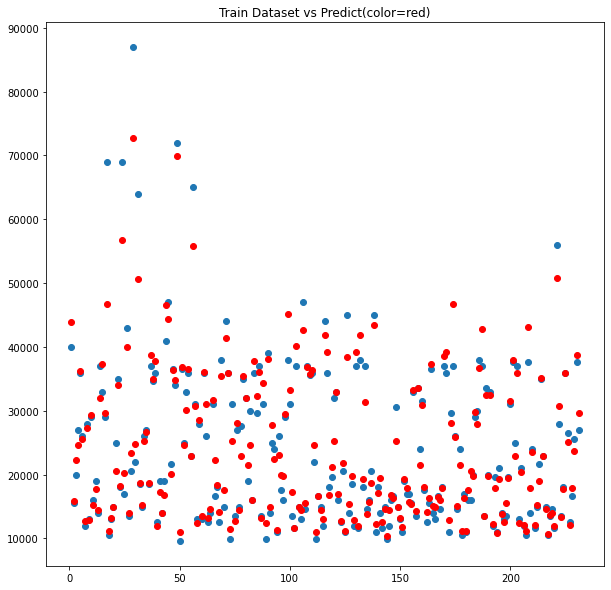

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(x=range(1,len(cars_train['price'])+1),y=cars_train['price'])
ax.scatter(x=range(1,len(cars_train['price'])+1),y=rfr_model.predict(cars_train.iloc[:,:-1]),color='r')
plt.title('Train Dataset vs Predict(color=red)')

In [38]:
cars_test = cars_encoded[~cars_encoded.isin(cars_train)].dropna()

In [40]:
len(cars_train)+len(cars_test)

378

In [39]:
cars_test

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
0,65012.0,2016.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25990.0
2,77118.0,2015.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13990.0
9,59633.0,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20590.0
10,88759.0,2014.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25590.0
16,53223.0,2013.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,25626.0,2016.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14990.0
363,50868.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14590.0
366,11585.0,2018.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24990.0
369,42873.0,2016.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12590.0


Text(0.5, 1.0, 'Test Data\nReal vs Predict(color=red)')

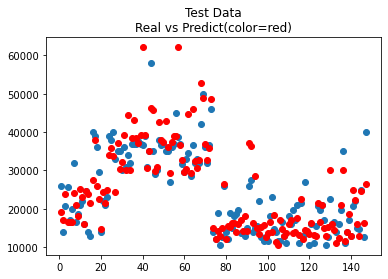

In [41]:
plt.scatter(x=range(1,len(cars_test['price'])+1),y=cars_test['price'])
plt.scatter(x=range(1,len(cars_test['price'])+1),y=rfr_model.predict(cars_test.iloc[:,:-1]),color='r')
plt.title('Test Data\nReal vs Predict(color=red)')

In [43]:
cars.groupby('brand').sum()['price']

brand
BMW           2025560
Tesla         3994550
Toyota         986170
Volkswagen    2160340
Name: price, dtype: int64